## Detecção de keypoints com dlib

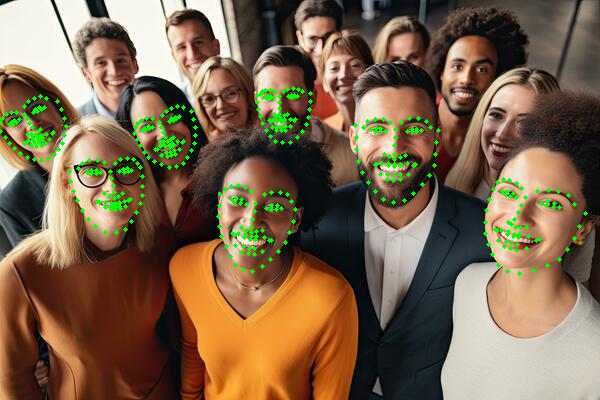

In [ ]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

# Carregar o detector de faces e o modelo de predição de pontos faciais
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Carregar uma imagem
image_path = "teste2.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar faces
faces = detector(gray)

for face in faces:
    # Obter os pontos faciais
    landmarks = predictor(gray, face)

    # Desenhar os pontos faciais na imagem
    for n in range(68):  # Existem 68 pontos-chave
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Mostrar a imagem com os pontos-chave
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!pip install mediapipe protobuf==3.19.6

  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.15
    Uninstalling mediapipe-0.10.15:
      Successfully uninstalled mediapipe-0.10.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-aiplatform 1.70.0 requires protobuf!=4.21.0,!=

## Detecção de keypoints com MediaPipe

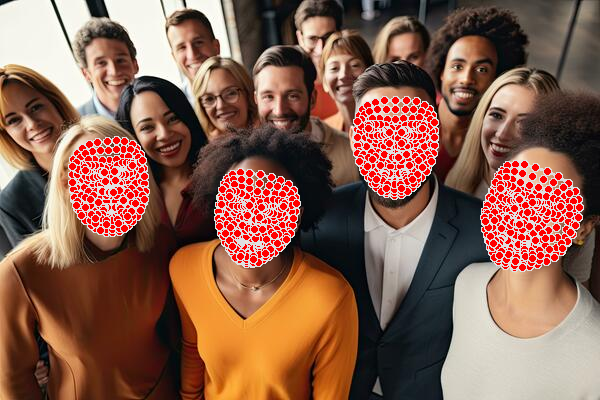

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Inicializar o MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Captura de vídeo ou imagem
imagem = cv2.imread('teste2.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Processar a imagem
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=20) as face_mesh:  # max_num_faces pode ser ajustado
    resultados = face_mesh.process(imagem_rgb)

    if resultados.multi_face_landmarks:
        for face_landmarks in resultados.multi_face_landmarks:
            # Desenhar os pontos de referência na imagem
            mp_drawing.draw_landmarks(imagem, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS)

# Mostrar a imagem com os pontos de referência
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


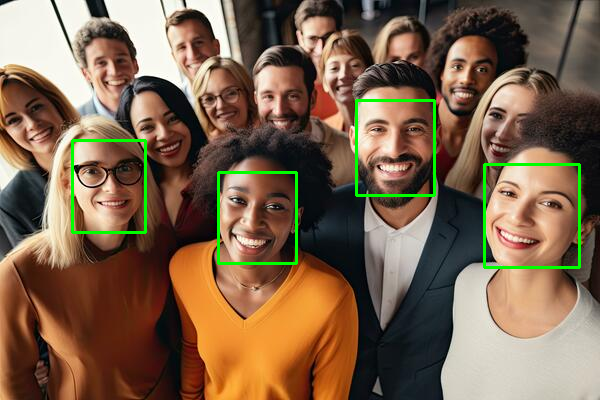

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Inicializar o MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Captura de vídeo ou imagem
imagem = cv2.imread('teste2.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Processar a imagem
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=5) as face_mesh:
    resultados = face_mesh.process(imagem_rgb)

    if resultados.multi_face_landmarks:
        for face_landmarks in resultados.multi_face_landmarks:
            # Calcular a caixa delimitadora (bounding box) usando os landmarks
            x_min = min([landmark.x for landmark in face_landmarks.landmark]) * imagem.shape[1]
            x_max = max([landmark.x for landmark in face_landmarks.landmark]) * imagem.shape[1]
            y_min = min([landmark.y for landmark in face_landmarks.landmark]) * imagem.shape[0]
            y_max = max([landmark.y for landmark in face_landmarks.landmark]) * imagem.shape[0]

            # Desenhar a caixa delimitadora ao redor do rosto
            cv2.rectangle(imagem, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

# Mostrar a imagem com as caixas delimitadoras
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
!pip install facenet_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 859.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

## MTCNN

Faces detectadas: 15


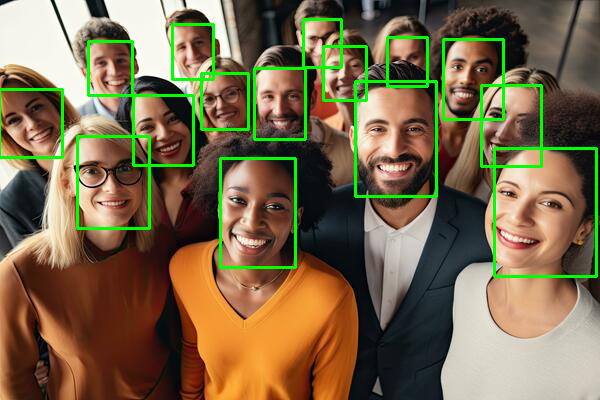

In [1]:
import cv2
import torch
from facenet_pytorch import MTCNN
import dlib
from google.colab.patches import cv2_imshow

# Inicializar o MTCNN para detecção de faces
mtcnn = MTCNN(keep_all=True)

# Carregar a imagem estática
imagem = cv2.imread('teste2.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Detectar faces com MTCNN
boxes, _ = mtcnn.detect(imagem_rgb)

if boxes is not None:
    print(f"Faces detectadas: {len(boxes)}")
    for box in boxes:
        # Obter as coordenadas do rosto
        x_min, y_min, x_max, y_max = [int(b) for b in box]

        # Desenhar a caixa delimitadora ao redor do rosto
        cv2.rectangle(imagem, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Mostrar a imagem com as caixas delimitadoras e os pontos de referência
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Detecção de emoções com dlib

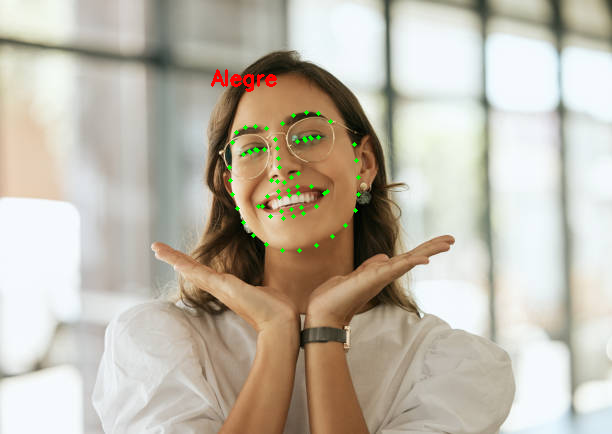

In [21]:
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow

# Carregar o detector de rosto e o preditor de landmarks do dlib
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Função para converter pontos dlib para arrays numpy
def dlib_to_numpy(landmarks, indices):
    return np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in indices])

# Função para detectar emoções com base em landmarks faciais
def detect_emotion(landmarks):
    # Extraindo pontos para olhos, sobrancelhas e boca
    left_eye = np.mean(dlib_to_numpy(landmarks, range(36, 42)), axis=0)
    right_eye = np.mean(dlib_to_numpy(landmarks, range(42, 48)), axis=0)
    mouth = np.mean(dlib_to_numpy(landmarks, range(48, 68)), axis=0)

    # Calcular distância entre olhos e boca para detectar uma emoção simples
    eye_mouth_distance = np.linalg.norm(left_eye - mouth)

    # Simples regra para emoções (exemplo básico)
    if eye_mouth_distance > 50:
        return "Alegre"
    elif eye_mouth_distance < 30:
        return "Triste"
    else:
        return "Neutro"

# Carregar imagem
image = cv2.imread("happy.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_detector(gray)

# Iterar sobre cada rosto detectado
for face in faces:
    # Prever landmarks faciais
    landmarks = landmark_predictor(gray, face)

    # Detectar emoção baseada nos landmarks
    emotion = detect_emotion(landmarks)

    # Desenhar landmarks e emoção na imagem
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    # Exibir emoção acima do rosto
    cv2.putText(image, emotion, (face.left(), face.top() - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Mostrar imagem com keypoints e emoção detectada
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
!pip install opencv-python deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e41128eec69d2347b38b50b085b53a728939debe806a5df7de1ef92b76aa2c1b
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


## Detecção de emoções com DeepFace

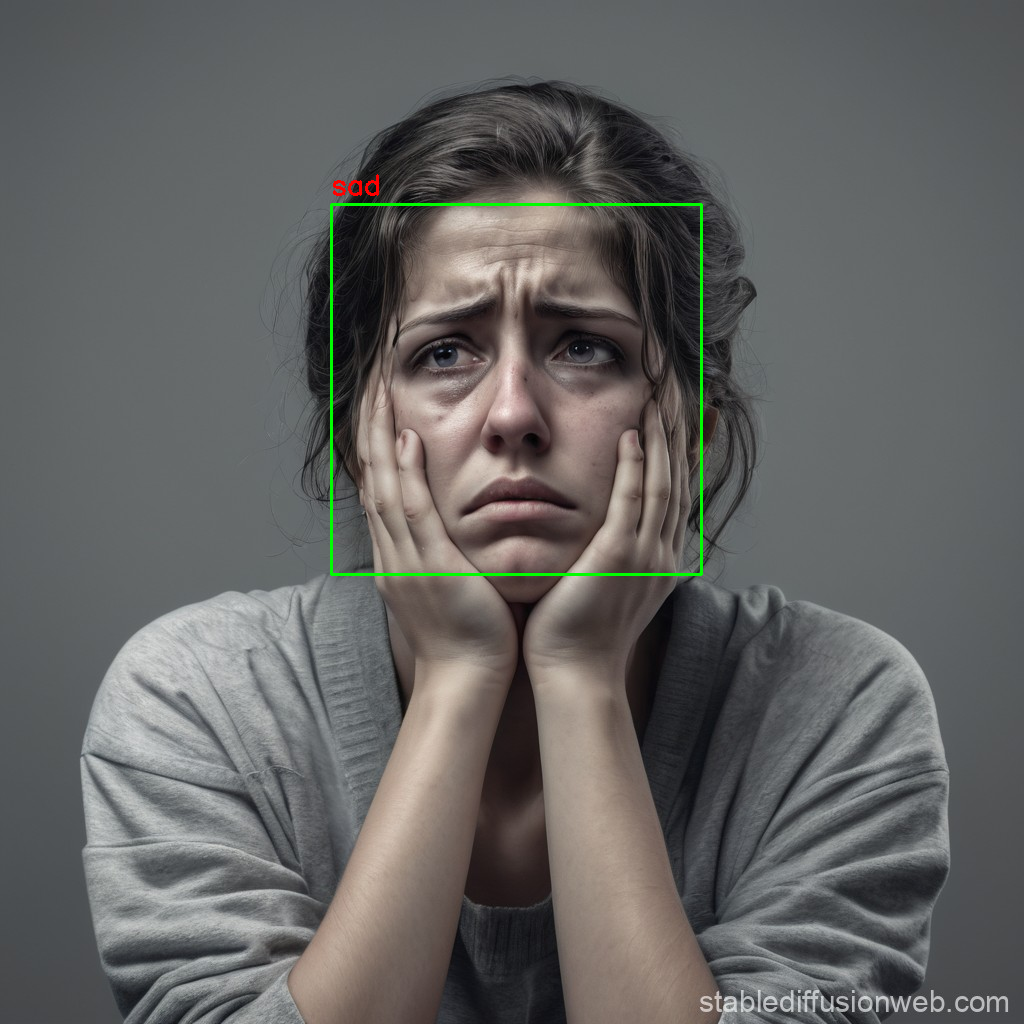

In [32]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow

# Carregar o classificador Haar Cascade para detecção de rosto
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Carregar a imagem
image = cv2.imread("sad.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterar sobre cada rosto detectado
for (x, y, w, h) in faces:
    # Extrair o rosto da imagem original
    face = image[y:y+h, x:x+w]

    # Usar o DeepFace para analisar emoções
    analysis = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)

    # Verificar se `analysis` é uma lista e extrair a emoção corretamente
    if isinstance(analysis, list):
        emotion = analysis[0]['dominant_emotion']  # Extrair o primeiro elemento da lista
    else:
        emotion = analysis['dominant_emotion']  # Se não for lista, acessa diretamente

    # Desenhar a caixa delimitadora ao redor do rosto
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibir a emoção acima do rosto
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Mostrar a imagem com as emoções detectadas
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


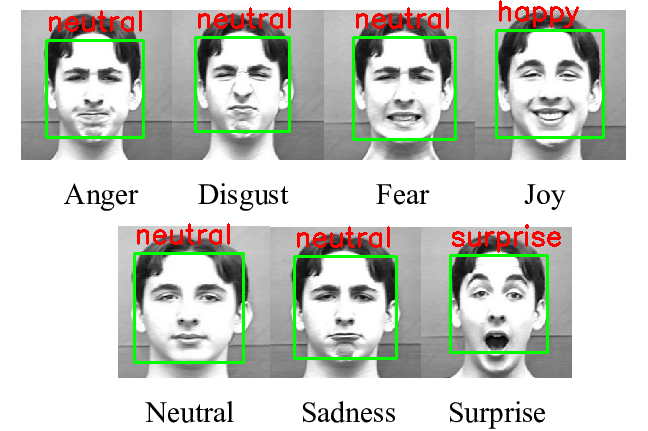

In [33]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow

# Carregar o classificador Haar Cascade para detecção de rosto
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Carregar a imagem
image = cv2.imread("basic_emotions.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterar sobre cada rosto detectado
for (x, y, w, h) in faces:
    # Extrair o rosto da imagem original
    face = image[y:y+h, x:x+w]

    # Usar o DeepFace para analisar emoções
    analysis = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)

    # Verificar se `analysis` é uma lista e extrair a emoção corretamente
    if isinstance(analysis, list):
        emotion = analysis[0]['dominant_emotion']  # Extrair o primeiro elemento da lista
    else:
        emotion = analysis['dominant_emotion']  # Se não for lista, acessa diretamente

    # Desenhar a caixa delimitadora ao redor do rosto
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibir a emoção acima do rosto
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Mostrar a imagem com as emoções detectadas
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


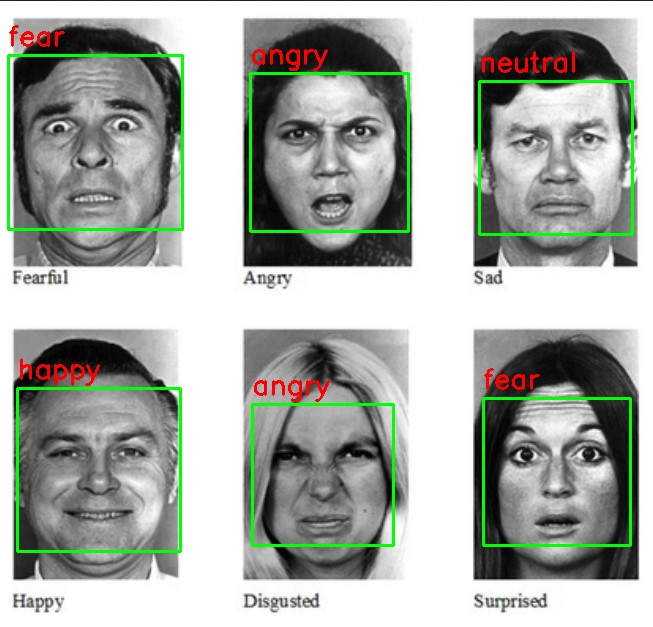

In [34]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow

# Carregar o classificador Haar Cascade para detecção de rosto
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Carregar a imagem
image = cv2.imread("basic_emotions2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterar sobre cada rosto detectado
for (x, y, w, h) in faces:
    # Extrair o rosto da imagem original
    face = image[y:y+h, x:x+w]

    # Usar o DeepFace para analisar emoções
    analysis = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)

    # Verificar se `analysis` é uma lista e extrair a emoção corretamente
    if isinstance(analysis, list):
        emotion = analysis[0]['dominant_emotion']  # Extrair o primeiro elemento da lista
    else:
        emotion = analysis['dominant_emotion']  # Se não for lista, acessa diretamente

    # Desenhar a caixa delimitadora ao redor do rosto
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibir a emoção acima do rosto
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Mostrar a imagem com as emoções detectadas
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
